In [149]:
import sys
import os
sys.path.append("path/utils")
import clus
import draw
import matplotlib.pyplot as plt
import scanpy as sc
from scipy.sparse import spmatrix

In [150]:
#load Data and make sure the data matrix is not sparse
adata = sc.read_h5ad("/home/share/ST_macaque/HIP_1015/HIP_macaque/bin50/macaque1/T33.h5ad")
if isinstance(adata.X, spmatrix):
    adata.X = adata.X.toarray()
adata

AnnData object with n_obs × n_vars = 44894 × 15388
    obs: 'gene_area'
    obsm: 'spatial'

In [151]:
# generate palette
palette = utils.draw.generateColor()
genes = {"PROX1":utils.draw.getPaletteColor(palette["DG"][0]),
        "HOMER3":utils.draw.getPaletteColor(palette["CA4"][0]), 
        "FIBCD1":utils.draw.getPaletteColor(palette["CA1"][0]), 
        "NTS":utils.draw.getPaletteColor(palette["SUB"][0])}
genes

{'PROX1': array([0.28426396, 0.85279188, 1.        ]),
 'HOMER3': array([1.        , 0.9017341 , 0.28323699]),
 'FIBCD1': array([1.        , 0.45528455, 0.55284553]),
 'NTS': array([0.28977273, 1.        , 0.69318182])}

In [152]:
# smooth genes 
adata = adata[:, list(genes)]
adata = utils.clus.smoothadata(adata, s=2)

In [153]:
# calculate colors 
sub, p = utils.draw.getcolor(adata, genes, thres2=3, quant=0.99)

<AxesSubplot:>

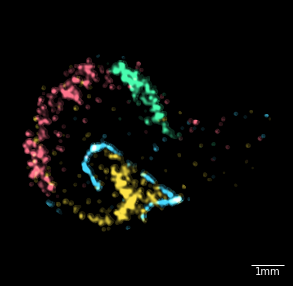

In [154]:
plt.style.use('dark_background')
utils.draw.drawSlice(sub, p, "c", dark=True)
plt.savefig("<path>/res.pdf")